FINAL DRONE ROUTES (Hybrid GA + Local Search)

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H4 -> H3 -> H28 -> H27 -> H29 -> H26 -> H25 -> H24 -> H30 -> H2 -> R0
    Total distance: 114.30 km
    Est. flight time: 63.50 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H60 -> H19 -> H20 -> H18 -> H59 -> H12 -> H15 -> H48 -> H52 -> H53 -> H72 -> H51 -> H50 -> H71 -> H47 -> H62 -> H63 -> H61 -> H23 -> H22 -> H21 -> R1
    Total distance: 322.14 km
    Est. flight time: 178.97 minutes
  Drone 2 Route: R1 -> H13 -> H11 -> H8 -> H56 -> H5 -> H14 -> H16 -> H57 -> H58 -> H17 -> H6 -> H54 -> H55 -> H7 -> H9 -> H10 -> H49 -> R1
    Total distance: 145.44 km
    Est. flight time: 80.80 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: R2 -> H38 -> H37 -> H

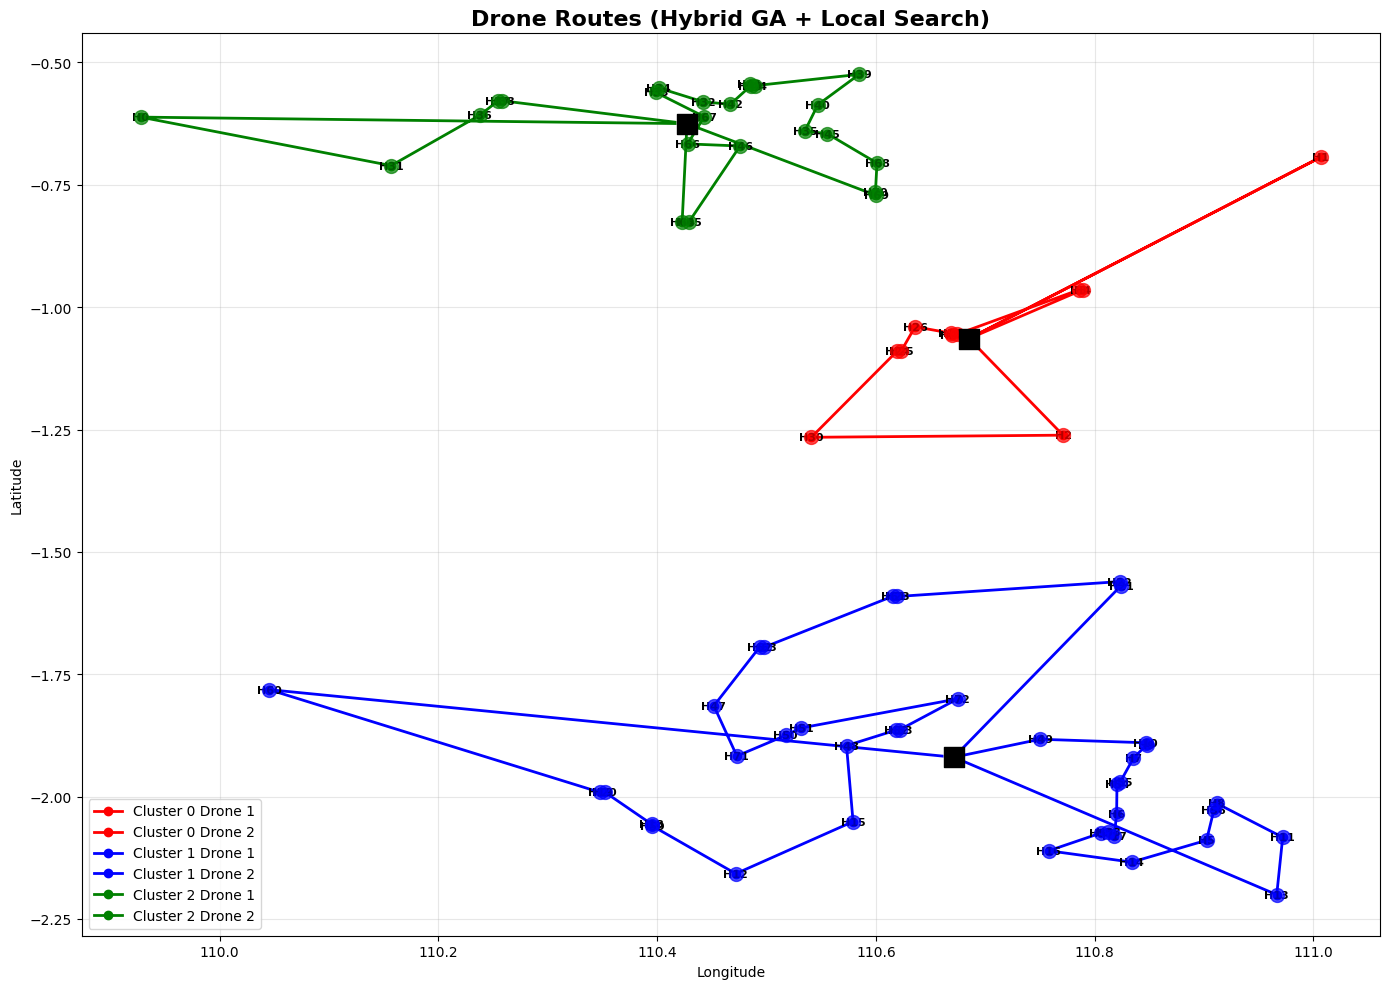

In [1]:
from ga_ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_Hybrid(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)

Hyperparameter Tuning

In [2]:
import optuna
from ga_ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    population_size = trial.suggest_int('population_size', 30, 100, step=10)
    generations = trial.suggest_int('generations', 100, 300, step=50)
    mutation_rate = trial.suggest_float('mutation_rate', 0.05, 0.3)
    local_search_freq = trial.suggest_int('local_search_freq', 5, 25, step=5)
    local_search_intensity = trial.suggest_int('local_search_intensity', 20, 100, step=10)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_Hybrid(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters(
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        local_search_freq=local_search_freq,
        local_search_intensity=local_search_intensity
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route in route_list:
            if len(route) < 2:
                continue
            for i in range(len(route) - 1):
                total_distance += routing.dist_matrix[route[i]][route[i + 1]]

    return total_distance 

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)

[I 2025-10-09 14:20:47,599] A new study created in memory with name: no-name-36baf14a-cc64-4428-ac41-ccbeda3e56fd


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-09 14:21:31,725] Trial 17 finished with value: 952.0686801909709 and parameters: {'population_size': 60, 'generations': 100, 'mutation_rate': 0.28326606312425723, 'local_search_freq': 15, 'local_search_intensity': 90}. Best is trial 17 with value: 952.0686801909709.
[I 2025-10-09 14:21:32,986] Trial 7 finished with value: 956.4154747004064 and parameters: {'population_size': 60, 'generations': 100, 'mutation_rate': 0.2073147423126565, 'local_search_freq': 5, 'local_search_intensity': 70}. Best is trial 17 with value: 952.0686801909709.
[I 2025-10-09 14:21:35,525] Trial 18 finished with value: 981.2531523436602 and parameters: {'population_size': 30, 'generations': 100, 'mutation_rate': 0.27448246678095845, 'local_search_freq': 20, 'local_search_intensity': 90}. Best is trial 17 with value: 952.0686801909709.
[I 2025-10-09 14:21:49,726] Trial 5 finished with value: 966.2626991782554 and parameters: {'population_size': 30, 'generations': 250, 'mutation_rate': 0.288977438016404

FINAL DRONE ROUTES (Hybrid GA + Local Search)

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H4 -> H3 -> H28 -> H27 -> H29 -> H26 -> H25 -> H24 -> H30 -> H2 -> R0
    Total distance: 114.30 km
    Est. flight time: 63.50 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H60 -> H47 -> H62 -> H63 -> H61 -> H23 -> H22 -> H21 -> H72 -> H53 -> H52 -> H48 -> H51 -> H50 -> H71 -> H20 -> H19 -> H18 -> H59 -> H12 -> H15 -> R1
    Total distance: 308.42 km
    Est. flight time: 171.34 minutes
  Drone 2 Route: R1 -> H13 -> H11 -> H8 -> H56 -> H5 -> H14 -> H16 -> H57 -> H58 -> H17 -> H6 -> H54 -> H55 -> H7 -> H9 -> H10 -> H49 -> R1
    Total distance: 145.44 km
    Est. flight time: 80.80 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: R2 -> H38 -> H37 -> H

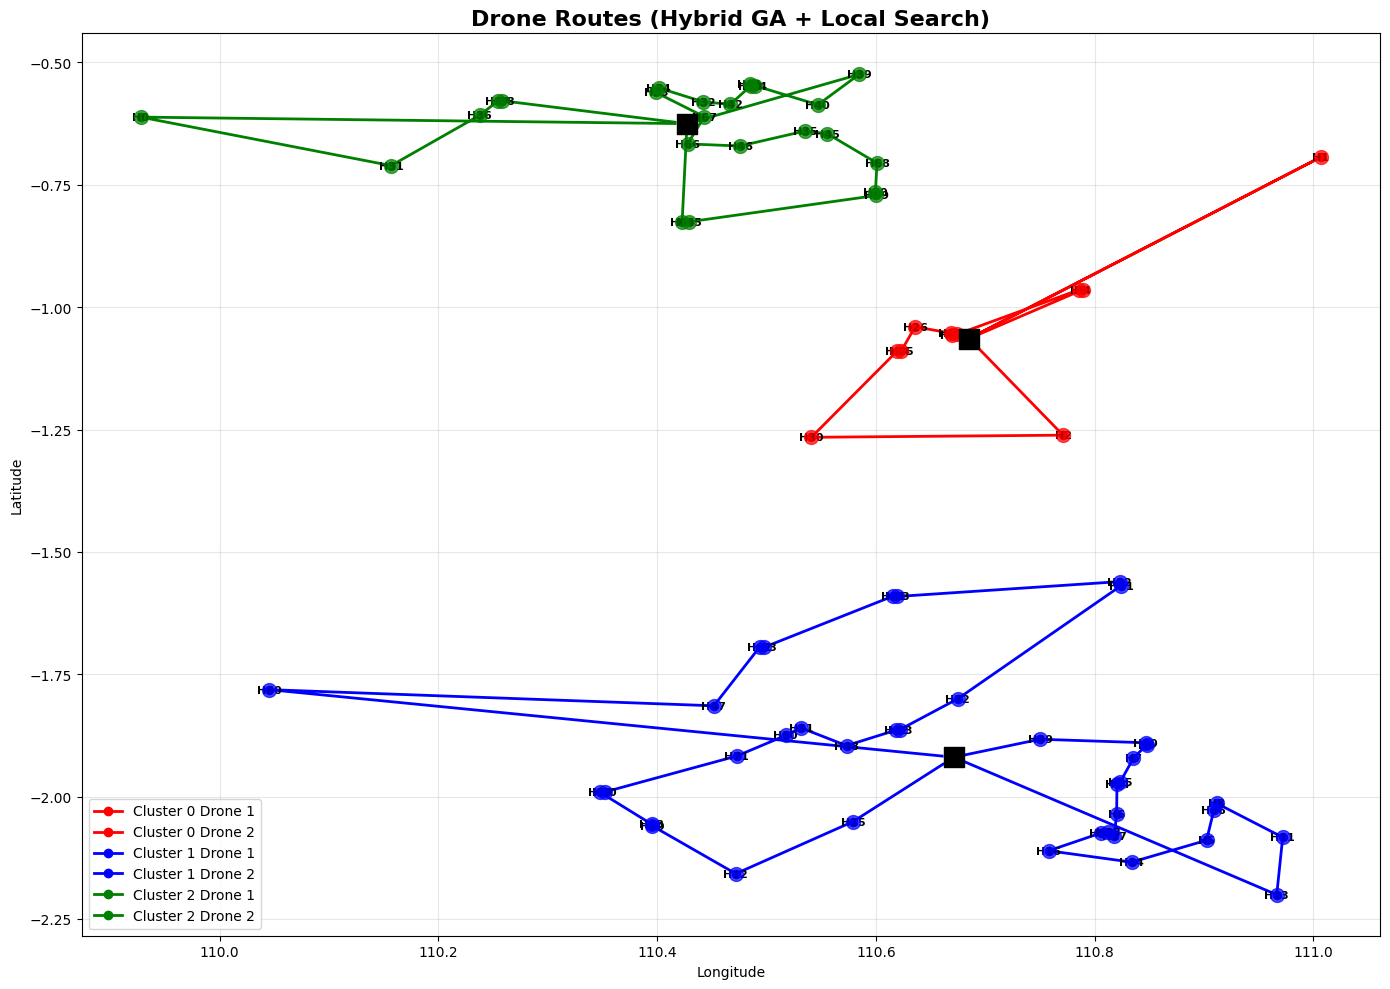

In [13]:
from ga_ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_Hybrid(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters(
    population_size=80,
    generations=200,
    mutation_rate=0.09257354711356147,
    local_search_freq=20,
    local_search_intensity=40
)

routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)